In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from twoDsampler import twoDsamplefromGaussian as tDsfG

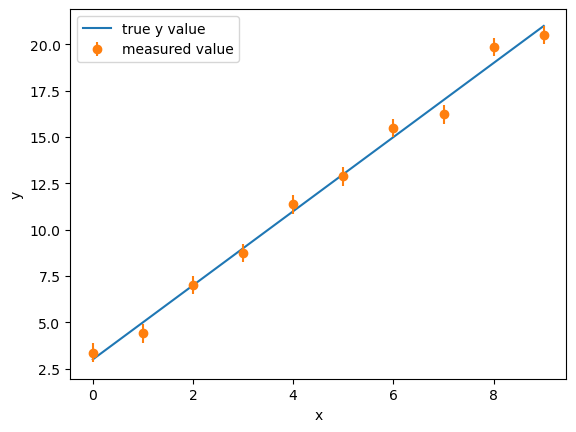

In [6]:
#making my probability function:

#set parameters, arrays
a=2
b=3
sig_y=0.5
data_len=10
y_i=np.zeros(data_len)
x_i=np.zeros(data_len)

def y_hat(x_i):
    return(a*x_i+b)

pi=np.pi
e=np.e

#create my x array, going to choose even spacing
x_i=np.arange(0,data_len)

from numpy import random
for i in range(len(x_i)):
    mean=a*x_i[i]+b
    sigma=sig_y

    s = np.random.normal(mean, sigma, 1)
    y_i[i]=s
    
#print(y_i)

plt.plot(x_i,y_hat(x_i), label="true y value")
plt.errorbar(x_i,y_i, yerr=sig_y, fmt='o', label="measured value")
plt.legend()
plt.ylabel("y")
plt.xlabel("x")

a_guess=np.linspace(a*0.8,a*1.2,500)
b_guess=np.linspace(b*0.8,b*1.2,400)

aa,bb=np.meshgrid(a_guess,b_guess)
chi2vals = np.zeros(np.prod(aa.shape))

#probability function
def prob(point):
    a_val,b_val=point
    val= -0.5*np.sum(((y_i-(a_val*x_i+b_val))/(sig_y))**2 )
    return val


In [7]:
#print(prob([2,3])/prob([0,2]))
#print(prob([0,2])/prob([2,3]))
print(prob([2,3]))
print(-0.5*np.sum(((y_i-(2*x_i+3))/(sig_y))**2 ))
print(sig_y)

-5.109626514693688
-5.109626514693688
0.5


In [8]:
#need to sample through a,b space with 2D sampler
#the sampler moves along the gradient of the probability function

maxstepa=0.1
maxstepb=0.1
initialpoint=[3,2]
numsteps=10000
samples=tDsfG(prob, maxstepa, maxstepb, initialpoint, numsteps)


100%|████████████████████████████████████| 9999/9999 [00:00<00:00, 13270.60it/s]


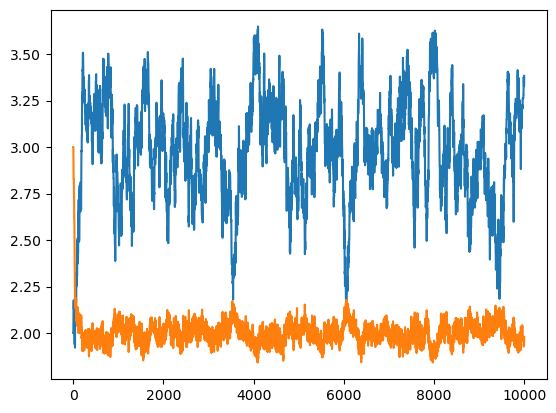

In [9]:
plt.plot(samples[:,1])
plt.plot(samples[:,0])

(10000, 2)


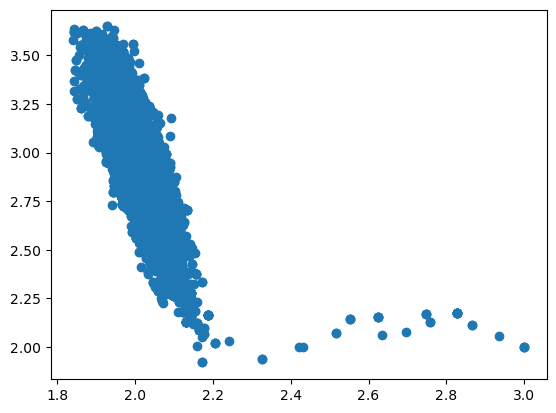

In [10]:
plt.scatter(samples[:,0], samples[:,1])
print(samples.shape)

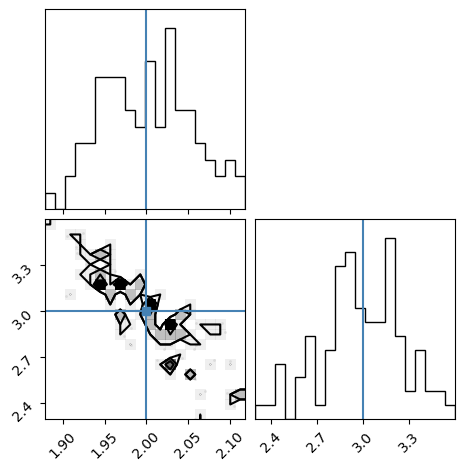

In [11]:
from corner import corner
fig = corner(samples[300::100], truths = [2,3])

#burn in of first 300 and only uses every 100th sample
#we need to use every nth data point because of the correlation between one data point and the next
#this is due to the finite step size of the sampler so that it sees the whole probability space
#the further away  2 points are the lower the correlation (in general I think)
#truths is the value of a and b used to generate the random data

In [12]:
#print(samples)

[[3.         2.        ]
 [3.         2.        ]
 [3.         2.        ]
 ...
 [1.94062565 3.3280346 ]
 [1.94062565 3.3280346 ]
 [1.97874419 3.38296907]]
